In [1]:
#Read data
import pandas as pd
X_train = pd.read_csv('train-data.csv')

X_test = pd.read_csv('test-data.csv')

Y_train = pd.read_csv('train-targets.csv')

Y_test = pd.read_csv('test-targets.csv')
len(X_train), len(X_test)


(3680, 919)

In [2]:
#Train Model without cross validation
from sklearn.svm import SVC
model = SVC(C=10, kernel='rbf', gamma = 0.02)

In [3]:
model.fit(X_train, Y_train.values.ravel())

y_pred = model.predict(X_test)

y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0,

In [4]:
# Report scores and accuracy
from sklearn import metrics

report = metrics.classification_report(Y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.92      0.84      0.87       580
           1       0.76      0.87      0.81       339

   micro avg       0.85      0.85      0.85       919
   macro avg       0.84      0.85      0.84       919
weighted avg       0.86      0.85      0.85       919



In [5]:
print("Model Accuracy without cross validation is : ", metrics.accuracy_score(Y_test, y_pred))

Model Accuracy without cross validation is :  0.848748639826


In [13]:
##### Trainin with cross validation

import numpy as np
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits = 3, shuffle = True, random_state =365)

gammas = [0.1, 0.05, 0.02, 0.01]
accuracy_scores = []

for gamma in gammas:
    model = SVC(C= 10, kernel = 'rbf', gamma=gamma)
    scores = cross_val_score(model, X_train, Y_train.values.ravel(), cv = kf, scoring = 'accuracy')
    accuracy_score = scores.mean()
    accuracy_scores.append(accuracy_score)
    Pscores = cross_val_score(model, X_train, Y_train.values.ravel(), cv = kf, scoring = 'precision')
    precision_score = Pscores.mean()
    Rscores = cross_val_score(model, X_train, Y_train.values.ravel(), cv = kf, scoring = 'recall')
    recall_score = Rscores.mean()
    Fscores = cross_val_score(model, X_train, Y_train.values.ravel(), cv = kf, scoring = 'f1')
    f1_score = Fscores.mean()
    print("For Gamma : " , gamma , " Accuracy is: " ,accuracy_score)
    print("For Gamma : " , gamma , " Precision is: " ,precision_score)
    print("For Gamma : " , gamma , " Recall is: " ,recall_score)
    print("For Gamma : " , gamma , " F1-score is: " ,f1_score)
    
best_index = np.array(accuracy_scores).argmax()
best_gamma = gammas[best_index]

model = SVC(C=10, kernel = 'rbf', gamma = best_gamma)
model.fit(X_train, Y_train.values.ravel())

y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, y_pred)

print("Best Accuracy is: " ,accuracy)

print("For Best Gamma value: " , best_gamma)

For Gamma :  0.1  Accuracy is:  0.752446428089
For Gamma :  0.1  Precision is:  0.848810722173
For Gamma :  0.1  Recall is:  0.464795187445
For Gamma :  0.1  F1-score is:  0.600122381339
For Gamma :  0.05  Accuracy is:  0.81168608431
For Gamma :  0.05  Precision is:  0.741603148047
For Gamma :  0.05  Recall is:  0.813878415617
For Gamma :  0.05  F1-score is:  0.775634478114
For Gamma :  0.02  Accuracy is:  0.832069402731
For Gamma :  0.02  Precision is:  0.765843283569
For Gamma :  0.02  Recall is:  0.837328089272
For Gamma :  0.02  F1-score is:  0.799607552912
For Gamma :  0.01  Accuracy is:  0.855166050434
For Gamma :  0.01  Precision is:  0.809078114155
For Gamma :  0.01  Recall is:  0.835950302774
For Gamma :  0.01  F1-score is:  0.822068910093
Accuracy is:  0.866158868335
For Gamma value:  0.01


In [7]:
report = metrics.classification_report(Y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       580
           1       0.79      0.86      0.83       339

   micro avg       0.87      0.87      0.87       919
   macro avg       0.85      0.87      0.86       919
weighted avg       0.87      0.87      0.87       919



In [8]:
df = pd.DataFrame(y_pred)

df.to_csv("test-pred.txt", index = False)

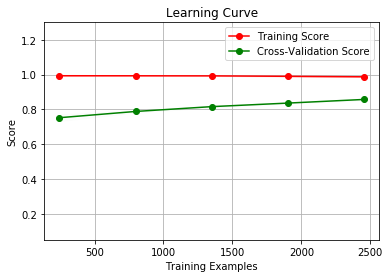

In [9]:
#Learning Curve

from sklearn.model_selection import learning_curve
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.title('Learning Curve')
plt.xlabel("Training Examples")
plt.ylabel('Score')
plt.grid()

model = SVC(C=10, kernel='rbf', gamma = best_gamma)

train_sizes, train_scores, val_scores = learning_curve(model, X_train, Y_train.values.ravel(), 
                                                      scoring = 'accuracy', cv = 3)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color = "r", label = "Training Score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                 train_scores_mean+train_scores_std, alpha = 0.1, color="r")

plt.plot(train_sizes, val_scores_mean, 'o-', color= 'g', label= 'Cross-Validation Score')

plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                val_scores_mean+val_scores_std, alpha = 0.01, color = 'g')

plt.ylim(0.05, 1.3)
plt.legend()
plt.savefig("SpamLearningCurve.png", dpi= 300)
plt.show()



In [10]:
# Extra: PCA
import numpy as np
from sklearn.decomposition import PCA
X = X_train
pca = PCA(n_components=2)
pca.fit(X)
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  


[ 0.92155296  0.07647084]
[ 38396.52542346  11060.62598947]


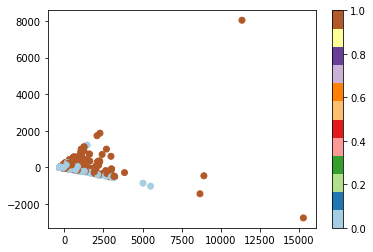

In [11]:
# Visualizing training data
plt.figure()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(X_train)
plt.scatter(proj[:, 0], proj[:, 1], c=Y_train.values.ravel(), cmap="Paired")
plt.colorbar()
plt.savefig("SpamVisualize.png", dpi= 300)

In [12]:
print(sum(Y_train.values.ravel() == 0))
print(sum(Y_train.values.ravel() == 1))

2207
1473
